# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [3]:
df = pd.read_csv('IceCreamData.csv')

In [4]:
df.sample(5)

,Temperature,Revenue
228,38.146333,850.246982
268,35.458136,828.296077
77,25.545966,591.173390
204,5.822332,186.476487
217,22.653136,532.054020


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


From above we can say that there is no null value in the dataset 

In [6]:
df.shape

(500, 2)

In [7]:
df.describe(include = 'all')

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


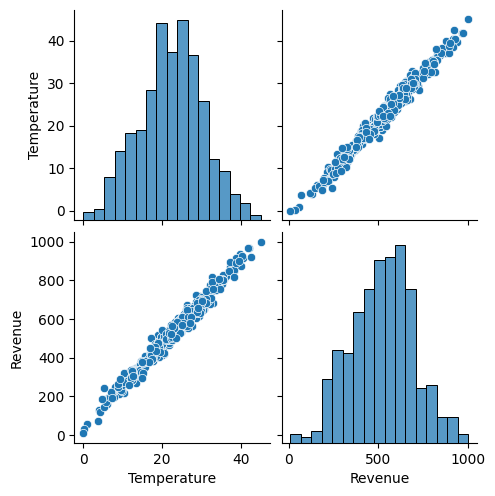

In [8]:
sns.pairplot(df)

So clearly we can see that there is a linear realtionship between tempearture and Revenue, so we will go for linear Regression

In [9]:
x = df['Temperature']
y = df['Revenue']

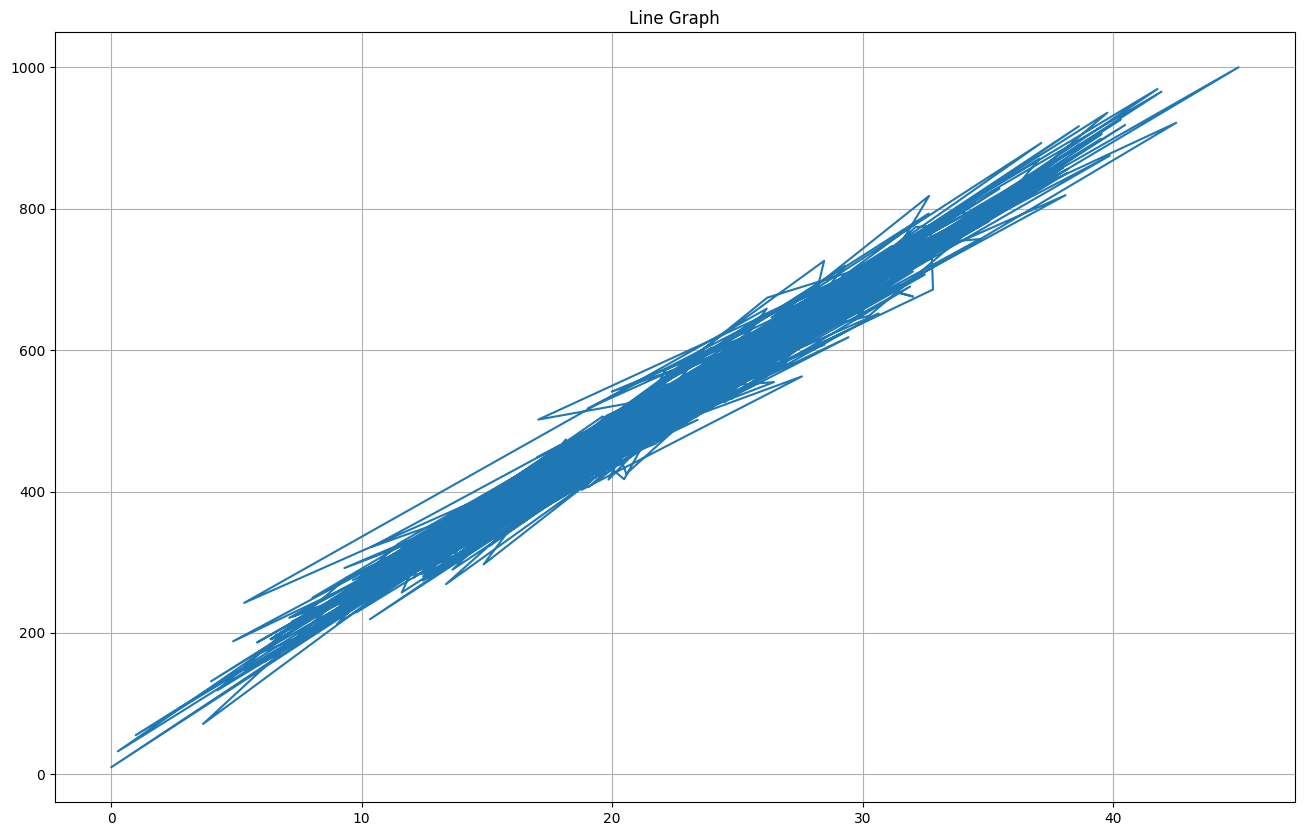

In [10]:
plt.figure(figsize=(16,10))
plt.title('Line Graph')
plt.grid()
plt.plot(x,y)
plt.show()

Therefore from above line graph we can say that both revenue and temperature are linearly dependent

# Defining both target and Features

In [11]:
df['Temperature'].ndim

1

So here we need to convert temperature from 1D to 2D array

In [12]:
temp = df['Temperature'].values.reshape(-1,1)

In [13]:
temp.ndim

2

# Creating the Model

## Splitting the data

In [14]:
target = df['Revenue']
features = df['Temperature']

Here temperature is in 1d array so we 

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state = 101)

## Trainig the model

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array([xtrain]).reshape(-1,1), ytrain)

LinearRegression()

# Evaluation

In [17]:
model.score(np.array([xtest]).reshape(-1,1), ytest) * 100

98.00417813541222

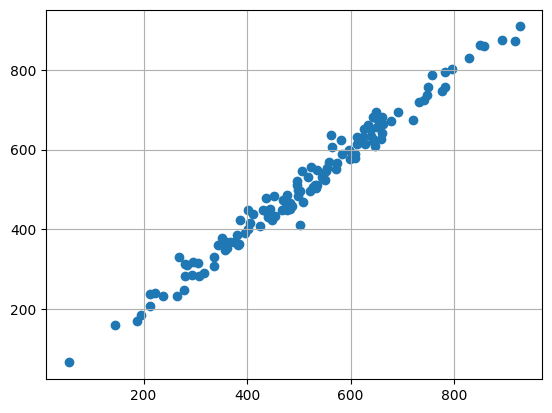

In [18]:
ypred_test = model.predict(np.array([xtest]).reshape(-1,1))
plt.scatter(ytest, ypred_test)
plt.grid()

In [19]:
query_data  = {'Temperature' : [30.56]}
result = model.predict(pd.DataFrame(query_data))
print(result[0])

700.1511770890958


c:\Users\Prerna Chauhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [22]:
#pd.to_pickle(model, 'HousePrice.pkl')
pd.to_pickle(model, 'ice_cream.pickle')